# Bank Customer Information and Marketing Response


### In this lesson, we have information about whether bank customers have time deposit subscriptions or not, we will use this data in our model

<a href='https://www.kaggle.com/datasets/zain280/bank-customer-information-and-marketing-response/code' target=_blank>You can find the data file here</a>

<img src=https://rprogress.org/wp-content/uploads/2023/06/When-to-Say-Yes-and-No-to-a-Line-of-Credit.png width='400'>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

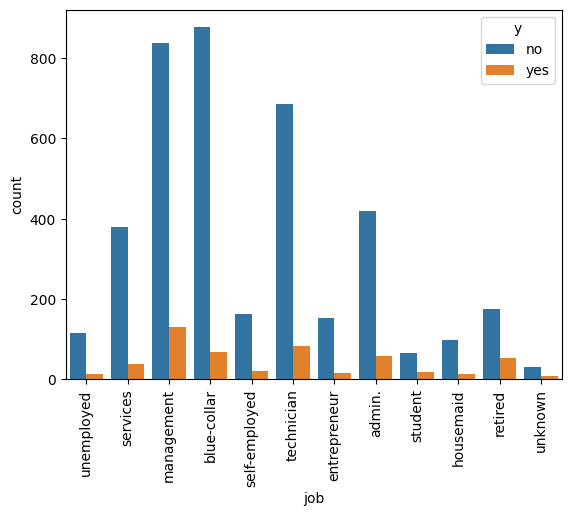

In [7]:
sns.countplot(x=df['job'],hue=df.y)
plt.xticks(rotation=90);

<Axes: ylabel='count'>

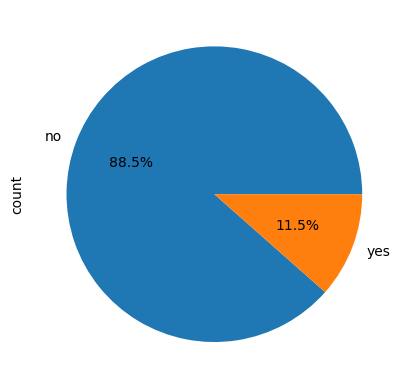

In [8]:
df['y'].value_counts().plot.pie(autopct='%1.1f%%')

In [9]:
df['month'].value_counts()

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

In [10]:
e={'no': 0, 'yes': 1}

In [11]:
f={'jan': 1, 'feb': 2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

In [12]:
g= {'single':0,'divorced':1,'married':2}

In [13]:
df['default']=df['default'].map(e)

In [14]:
df['housing']=df['housing'].map(e)

In [15]:
df['loan']=df['loan'].map(e)

In [16]:
df['y']=df['y'].map(e)

In [17]:
df['month'] = df['month'].map(f)

In [18]:
df['marital']=df['marital'].map(g)

In [19]:
df['contact'] = df['contact'].str.replace('cellular', 'telephone')

In [20]:
h={'unknown': 0, 'telephone': 1}

In [21]:
df['contact']=df['contact'].map(h)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,2,primary,0,1787,0,0,1,19,10,79,1,-1,0,unknown,0
1,33,services,2,secondary,0,4789,1,1,1,11,5,220,1,339,4,failure,0
2,35,management,0,tertiary,0,1350,1,0,1,16,4,185,1,330,1,failure,0
3,30,management,2,tertiary,0,1476,1,1,0,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,2,secondary,0,0,1,0,0,5,5,226,1,-1,0,unknown,0


In [23]:
df.describe()

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1.354125,0.016810,1422.657819,0.566025,0.152842,0.707144,15.915284,6.166777,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,0.870617,0.128575,3009.638142,0.495676,0.359875,0.455123,8.247667,2.378380,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,2.000000,0.000000,444.000000,1.000000,0.000000,1.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,1.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,2.000000,1.000000,71188.000000,1.000000,1.000000,1.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


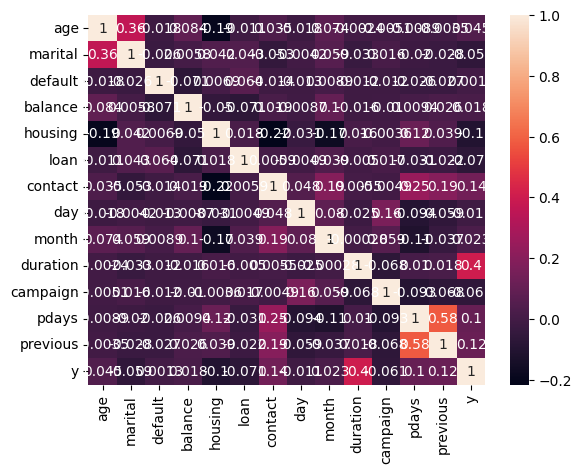

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

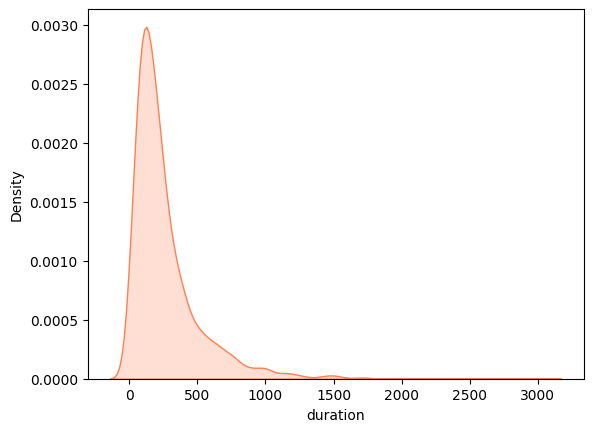

In [25]:
sns.kdeplot(data=df, x='duration', fill=True, color='coral')
plt.xlabel('duration')
plt.show()

In [26]:
outliers = df.select_dtypes(include=[np.number]).quantile(0.9)

In [27]:
df=df[(df['duration']<outliers['duration'])]

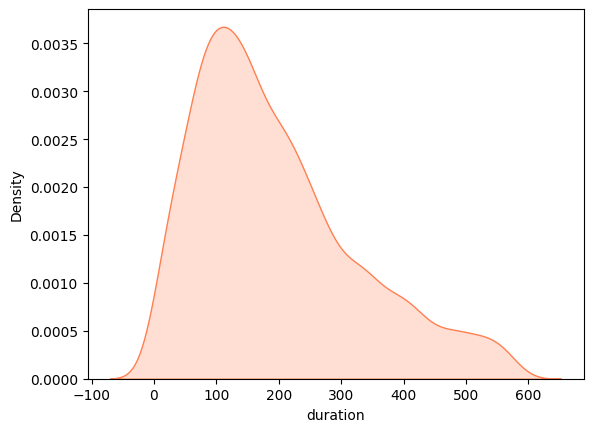

In [28]:
sns.kdeplot(data=df, x='duration', fill=True, color='coral')
plt.xlabel('duration')
plt.show()

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
x=df.drop('y',axis=1)
y=df[['y']]

In [31]:
x.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,2,0,1787,0,0,1,19,10,79,...,False,False,True,False,False,False,False,False,False,True
1,33,2,0,4789,1,1,1,11,5,220,...,False,False,False,False,True,False,False,False,False,False
2,35,0,0,1350,1,0,1,16,4,185,...,False,False,False,False,False,True,False,False,False,False
3,30,2,0,1476,1,1,0,3,6,199,...,False,False,False,False,False,True,False,False,False,True
4,59,2,0,0,1,0,0,5,5,226,...,False,False,False,False,True,False,False,False,False,True


In [32]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [36]:
x.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,2,0,1787,0,0,1,19,10,79,...,False,False,True,False,False,False,False,False,False,True
1,33,2,0,4789,1,1,1,11,5,220,...,False,False,False,False,True,False,False,False,False,False
2,35,0,0,1350,1,0,1,16,4,185,...,False,False,False,False,False,True,False,False,False,False
3,30,2,0,1476,1,1,0,3,6,199,...,False,False,False,False,False,True,False,False,False,True
4,59,2,0,0,1,0,0,5,5,226,...,False,False,False,False,True,False,False,False,False,True


In [37]:
model=Sequential()

model.add(Dense(18,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=45, verbose=1)

Epoch 1/45
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7994 - loss: 0.5976 - val_accuracy: 0.9177 - val_loss: 0.5084
Epoch 2/45
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9086 - loss: 0.4429 - val_accuracy: 0.9177 - val_loss: 0.3674
Epoch 3/45
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9241 - loss: 0.3395 - val_accuracy: 0.9177 - val_loss: 0.2908
Epoch 4/45
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9089 - loss: 0.3195 - val_accuracy: 0.9177 - val_loss: 0.2670
Epoch 5/45
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9254 - loss: 0.2631 - val_accuracy: 0.9177 - val_loss: 0.2565
Epoch 6/45
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9239 - loss: 0.2566 - val_accuracy: 0.9177 - val_loss: 0.2531
Epoch 7/45
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9179 - loss: 0.2684 - val_accuracy: 0.9177 - val_loss: 0.2491
Epoch 8/45
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9178 - loss: 0.2653 - va

In [39]:
loss,accuracy=model.evaluate(x_test,y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.9316 - loss: 0.2076


In [40]:
accuracy

0.9324324131011963

In [41]:
tahmin=model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [42]:
model.save('banka.h5')

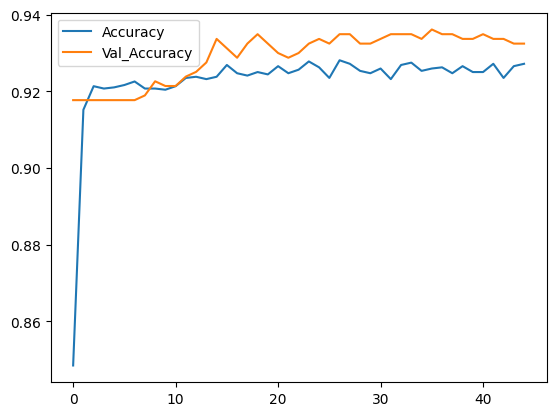

In [43]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

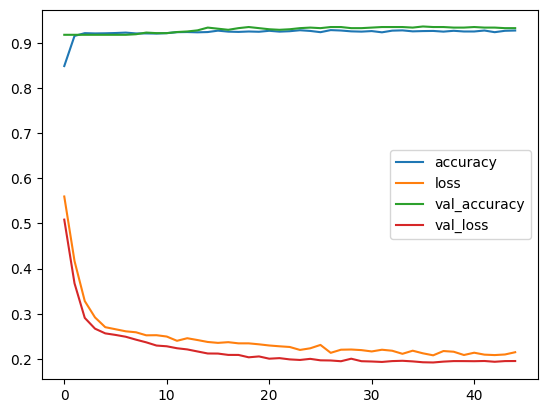

In [44]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [46]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[747,   0],
       [ 67,   0]])

In [47]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

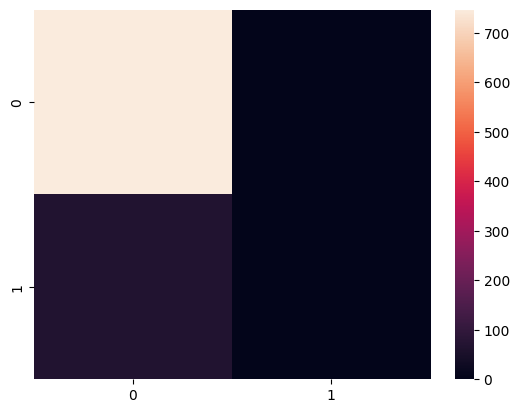

In [48]:

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [49]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       747
           1       0.00      0.00      0.00        67

    accuracy                           0.92       814
   macro avg       0.46      0.50      0.48       814
weighted avg       0.84      0.92      0.88       814



 # accuracy: 0.9316 - loss: 0.2076
 # With this model, the bank can decide more quickly whether to give loans to its customers or not